In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
import io
iris = pd.read_csv('IRIS.csv', encoding='latin1')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import  is_numeric_dtype
le = LabelEncoder()

In [9]:
for i in iris.columns:
  if is_numeric_dtype(iris[i]):
    continue
  else:
    iris[i] = le.fit_transform(iris[i])

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


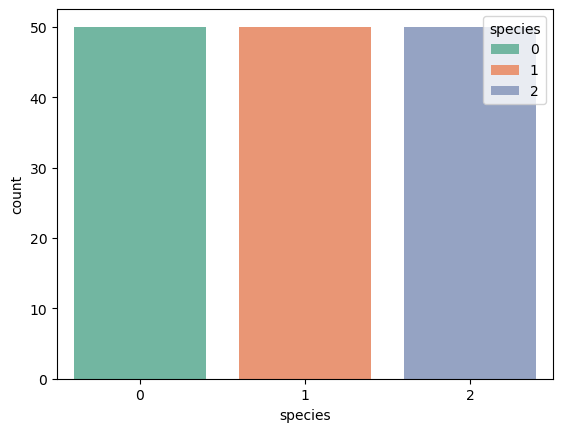

In [31]:
sns.countplot(x='species',data=iris, palette="Set2", hue='species')
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

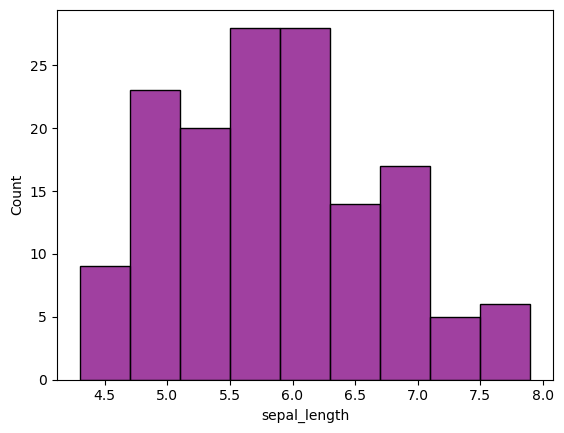

In [12]:
sns.histplot(data =iris, x=iris.sepal_length, color='purple')

<Axes: xlabel='sepal_width', ylabel='Count'>

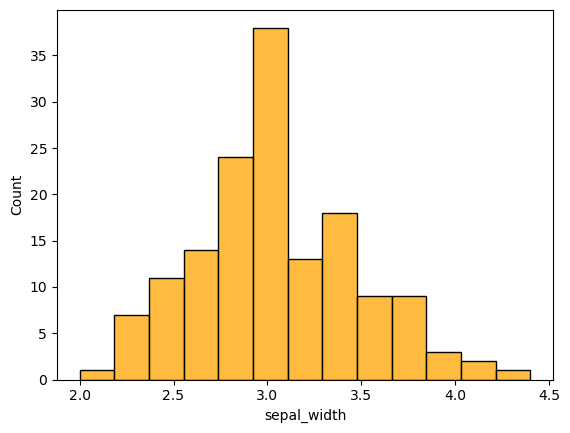

In [13]:
sns.histplot(data =iris, x=iris.sepal_width, color='orange')

<Axes: xlabel='petal_length', ylabel='Count'>

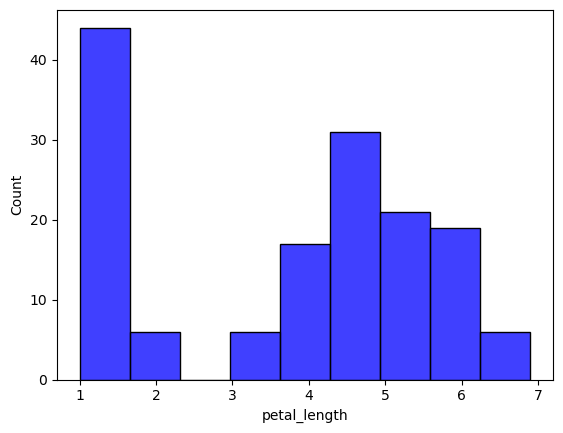

In [14]:
sns.histplot(data =iris, x=iris.petal_length, color='blue')

<Axes: xlabel='petal_width', ylabel='Count'>

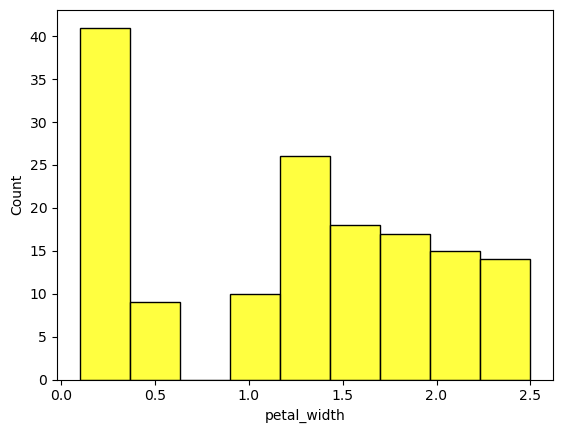

In [15]:
sns.histplot(data =iris, x=iris.petal_width, color='yellow')

<Axes: >

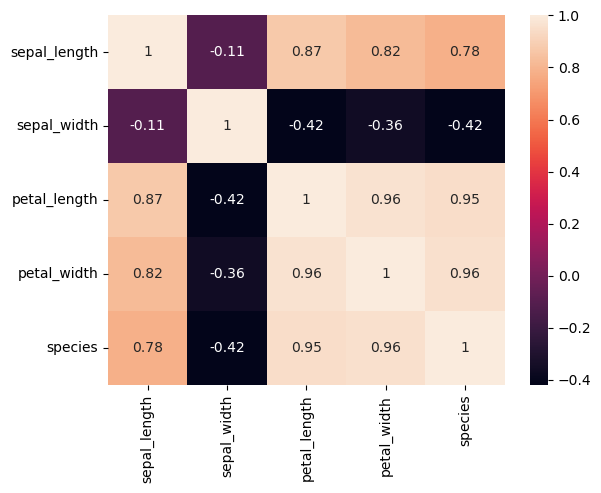

In [16]:
corr = iris.corr()
sns.heatmap(corr, annot=True)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
x = iris.drop('species', axis=1)
y = iris['species']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
Model = LogisticRegression()
Model.fit(x_train, y_train)

LogisticRegression()

In [23]:
print("score for Train data", Model.score(x_train, y_train))
print("score for Test data", Model.score(x_test, y_test))

score for Train data 0.975
score for Test data 1.0


In [24]:
from sklearn.ensemble import RandomForestClassifier

Model2 = RandomForestClassifier(n_estimators=300, random_state=100)
Model2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=100)

In [25]:
print("score for Train data", Model2.score(x_train, y_train))
print("score for Test data", Model2.score(x_test, y_test))

score for Train data 1.0
score for Test data 1.0


In [26]:
from sklearn.neighbors import KNeighborsClassifier

Model3 = KNeighborsClassifier()
Model3.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
print("score for Train data", Model3.score(x_train, y_train))
print("score for Test data", Model3.score(x_test, y_test))

score for Train data 0.9666666666666667
score for Test data 1.0


In [28]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [29]:
data = {'sepal_length': [5.2], 'sepal_width': [3.6], 'petal_length': [1.4], 'petal_width': [0.2]}
trail = pd.DataFrame(data)

In [30]:
result = Model.predict(trail)
print("Result Species:", result[0])

Result Species: 0
